Github
https://github.com/Shadowjumper3000/ML-fundamentals-2025

# Bike Rental Analysis
This analysis explores patterns in bike rental data to understand key factors influencing rental behavior. The data is sourced from the UCI Machine Learning Repository and contains hourly rental data spanning two years. The analysis is structured as follows:


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('default')
sns.set_theme()

# Load the dataset
hour_data = pd.read_csv('../data/hour.csv')

## 1. Initial Data Exploration
Let's examine the basic structure and statistics of our dataset.
AI was used to write the functions for the analysis.

In [61]:
# Initial Data Exploration
print("Dataset Shape:", hour_data.shape)
print("\nDataset Info:")
print(hour_data.info())
print("\nDescriptive Statistics:")
print(hour_data.describe())

Dataset Shape: (17379, 17)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

D

### 1.1 Target Variable Analysis
Analyzing the distribution of bike rentals (cnt) to understand the general rental patterns.


Skewness of cnt: 1.2774116037490577


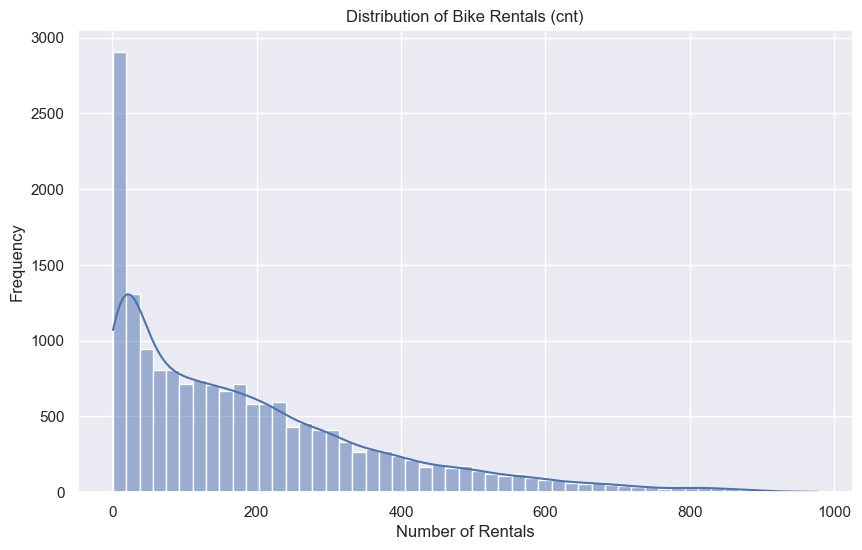

In [62]:
# Target Variable Analysis (cnt)
plt.figure(figsize=(10, 6))
sns.histplot(hour_data['cnt'], kde=True)
plt.title('Distribution of Bike Rentals (cnt)')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
print("\nSkewness of cnt:", hour_data['cnt'].skew())

### 1.2 Temporal Pattern Analysis
Examining how rental patterns vary by hour and season.

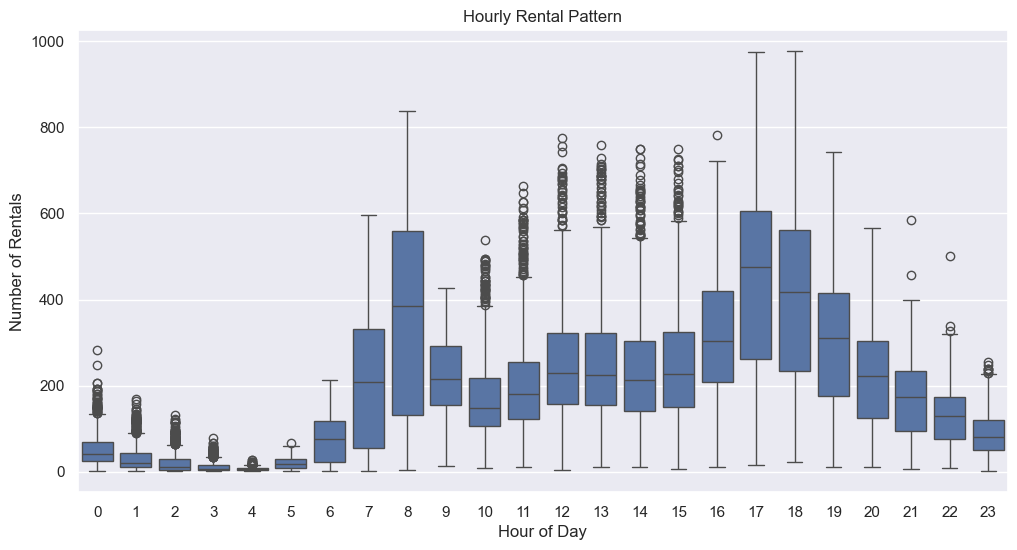

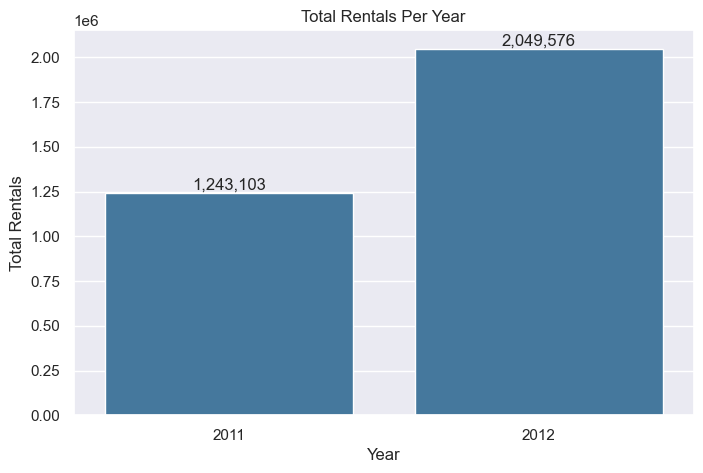

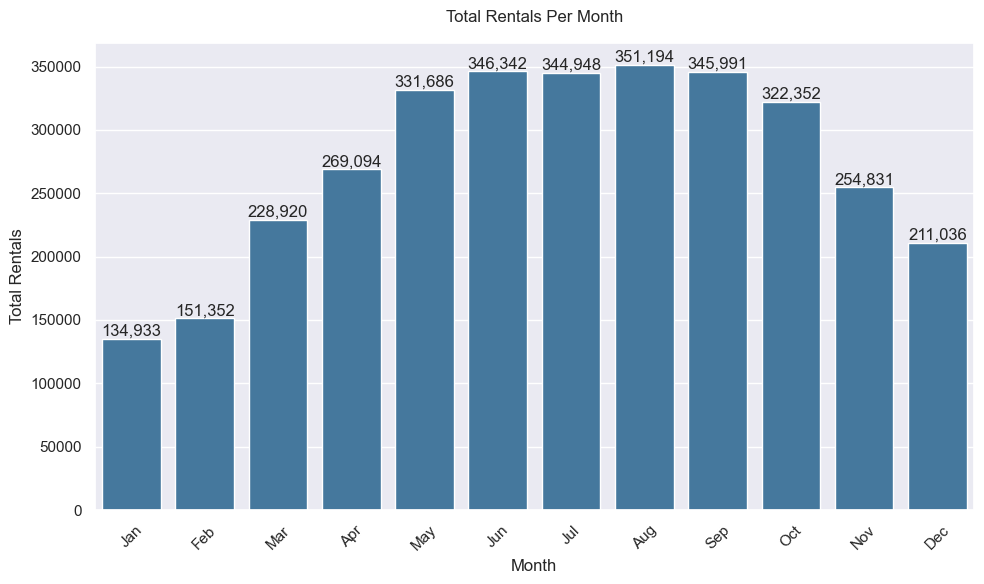

In [63]:
# Hour analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=hour_data)
plt.title('Hourly Rental Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rentals')

# Rentals per year
# Calculate total rentals per year
yearly_rentals = hour_data.groupby(hour_data['yr'].map({0: 2011, 1: 2012}))['cnt'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=['2011', '2012'], y=yearly_rentals, color=sns.color_palette("Blues_d")[3])
plt.title('Total Rentals Per Year')
plt.xlabel('Year')
plt.ylabel('Total Rentals')


# Add value labels on top of bars
for i, v in enumerate(yearly_rentals):
    plt.text(i, v, f'{int(v):,}', ha='center', va='bottom')

# Rentals per month
# Calculate total rentals per month
monthly_rentals = hour_data.groupby(hour_data['mnth'])['cnt'].sum()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=range(12), y=monthly_rentals, color=sns.color_palette("Blues_d")[3])
plt.title('Total Rentals Per Month', pad=15)
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(ticks=range(12), 
          labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
          rotation=45)

# Add value labels on top of bars
for i, v in enumerate(monthly_rentals):
    ax.text(i, v, f'{int(v):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 1.3 Holiday and Working Day Analysis
Investigating how holidays and working days affect rental patterns.

C:\Users\DAHoe\AppData\Local\Temp\ipykernel_13344\1017616823.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([holiday_labels[i] for i in [0, 1]])
C:\Users\DAHoe\AppData\Local\Temp\ipykernel_13344\1017616823.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([workingday_labels[i] for i in [0, 1]])


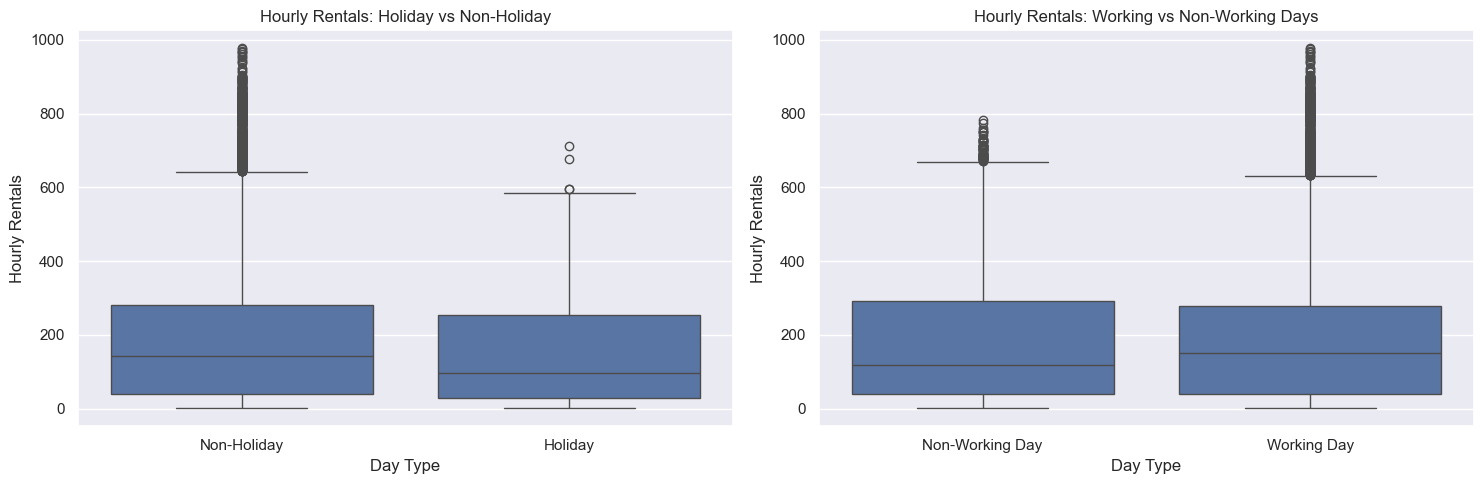

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Holiday analysis at hourly level
holiday_labels = {0: 'Non-Holiday', 1: 'Holiday'}
sns.boxplot(x='holiday', y='cnt', data=hour_data, ax=ax1)
ax1.set_title('Hourly Rentals: Holiday vs Non-Holiday')
ax1.set_xticklabels([holiday_labels[i] for i in [0, 1]])
ax1.set_xlabel('Day Type')
ax1.set_ylabel('Hourly Rentals')

# Working day analysis at hourly level
workingday_labels = {0: 'Non-Working Day', 1: 'Working Day'}
sns.boxplot(x='workingday', y='cnt', data=hour_data, ax=ax2)
ax2.set_title('Hourly Rentals: Working vs Non-Working Days')
ax2.set_xticklabels([workingday_labels[i] for i in [0, 1]])
ax2.set_xlabel('Day Type')
ax2.set_ylabel('Hourly Rentals')

plt.tight_layout()

### 1.4 Weather Impact Analysis
Analyzing how different weather conditions affect rental behavior.

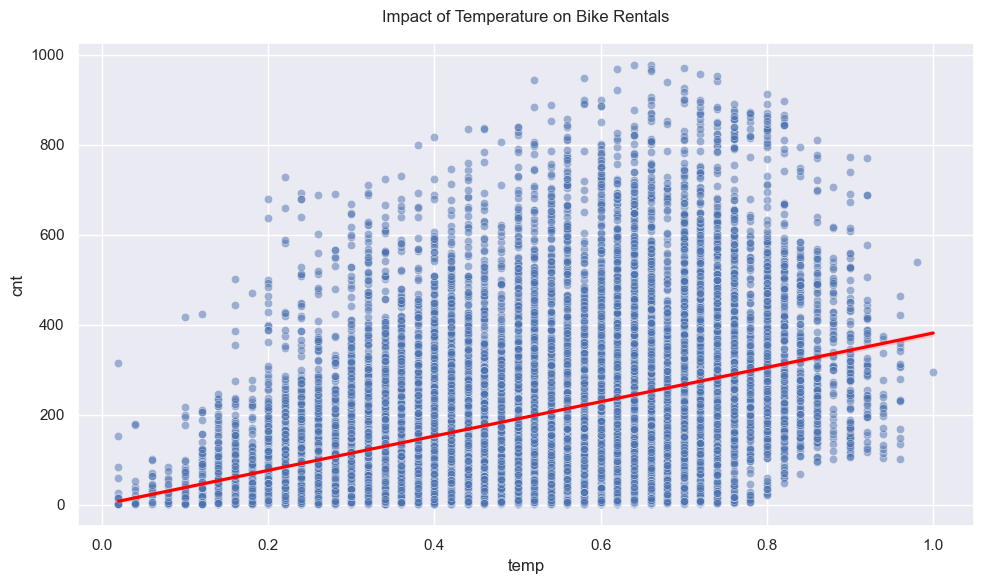

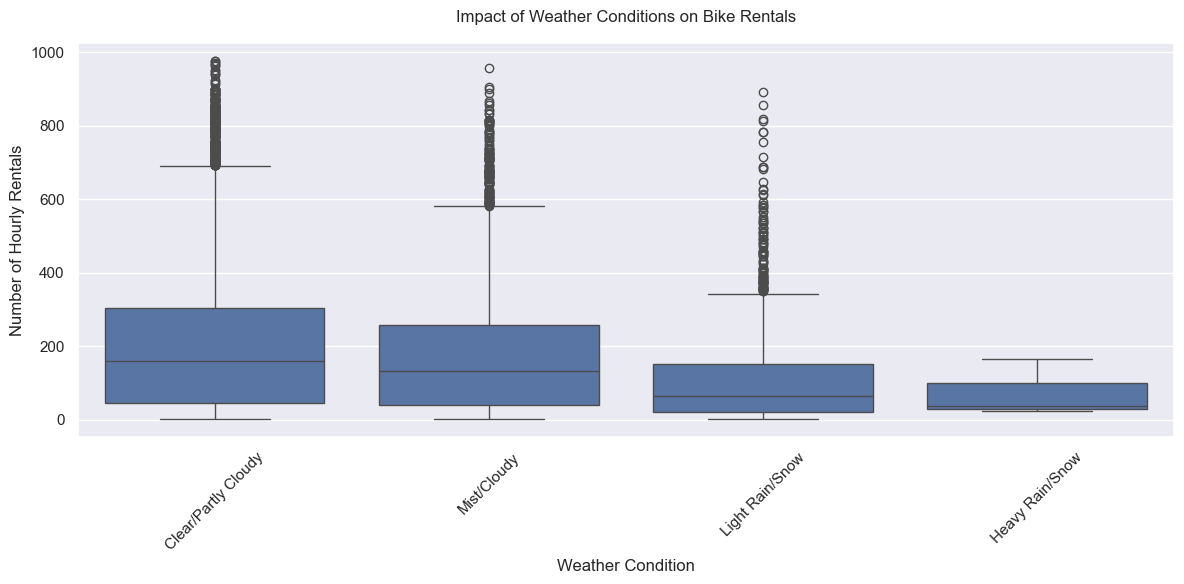

In [65]:
# Define weather situation mapping
weather_labels = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

# Temperature vs Count with improved styling
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_data, alpha=0.5)
plt.title('Impact of Temperature on Bike Rentals', pad=15)
plt.xlabel('Temperature (Normalized 0-1 scale)')
plt.ylabel('Number of Hourly Rentals')

# Add trend line
sns.regplot(x='temp', y='cnt', data=hour_data, scatter=False, color='red')

plt.tight_layout()
plt.show()

# Weather Situation vs Count with descriptive labels
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', data=hour_data)
plt.title('Impact of Weather Conditions on Bike Rentals', pad=15)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Hourly Rentals')

# Update x-axis labels with weather descriptions
plt.xticks(range(len(weather_labels)), 
          [weather_labels[i] for i in range(1, 5)], 
          rotation=45)

plt.tight_layout()
plt.show()

### 1.5 Feature Correlation Analysis
Examining relationships between numerical features.

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

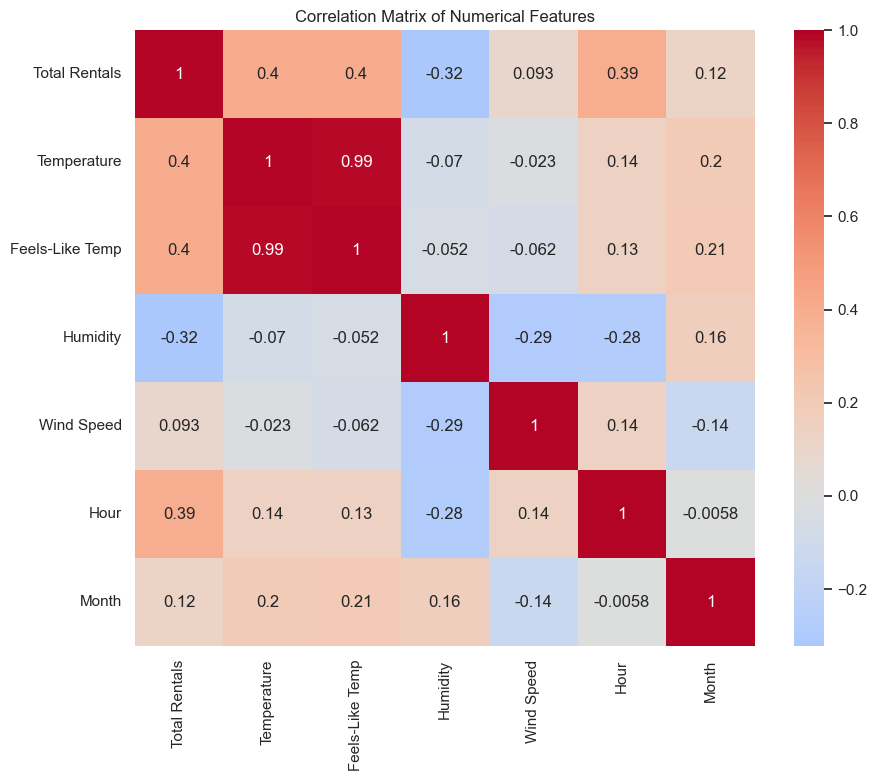

In [66]:
feature_labels = {
    'cnt': 'Total Rentals',
    'temp': 'Temperature',
    'atemp': 'Feels-Like Temp',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'hr': 'Hour',
    'mnth': 'Month'
}

correlation_features = ['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'hr', 'mnth']
correlation_matrix = hour_data[correlation_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            xticklabels=[feature_labels[col] for col in correlation_features],
            yticklabels=[feature_labels[col] for col in correlation_features])
plt.title('Correlation Matrix of Numerical Features')

In [67]:
# Calculate rental distribution statistics
print("1. Distribution Statistics:")
print(f"Mean rentals: {hour_data['cnt'].mean():.2f}")
print(f"Median rentals: {hour_data['cnt'].median():.2f}")
print(f"Skewness: {hour_data['cnt'].skew():.2f}")

# Calculate peak hours statistics
hourly_avg = hour_data.groupby('hr')['cnt'].mean()
peak_hours = hourly_avg.nlargest(3)
print("\n2. Peak Hours:")
print(peak_hours)

# Calculate weather correlations
print("\n3. Weather Correlations:")
print(f"Temperature correlation: {hour_data['cnt'].corr(hour_data['temp']):.2f}")
print(f"Humidity correlation: {hour_data['cnt'].corr(hour_data['hum']):.2f}")
print(f"Wind speed correlation: {hour_data['cnt'].corr(hour_data['windspeed']):.2f}")

1. Distribution Statistics:
Mean rentals: 189.46
Median rentals: 142.00
Skewness: 1.28

2. Peak Hours:
hr
17    461.452055
18    425.510989
8     359.011004
Name: cnt, dtype: float64

3. Weather Correlations:
Temperature correlation: 0.40
Humidity correlation: -0.32
Wind speed correlation: 0.09


We will drop the 'instant' and 'dteday' columns as they are not needed for our analysis. The 'instant' column is an index, and 'dteday' is a date column that we will not use in our analysis.
'casual' and 'registered' columns are also dropped as they are only gathered after bike rental. We will only use the 'cnt' column as our target variable.

In [68]:
# Drop index-like or redundant columns
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']

# Drop columns and create clean dataset
hour_data_clean = hour_data.drop(columns=columns_to_drop)

print("\nColumns dropped:", columns_to_drop)
print("Remaining columns:", hour_data_clean.columns.tolist())

# Update our working dataset
hour_data = hour_data_clean


Columns dropped: ['instant', 'dteday', 'casual', 'registered']
Remaining columns: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


Correlation between temp and atemp: 0.988

Correlations with rental count (cnt):
Temperature: 0.405
Apparent Temperature: 0.401


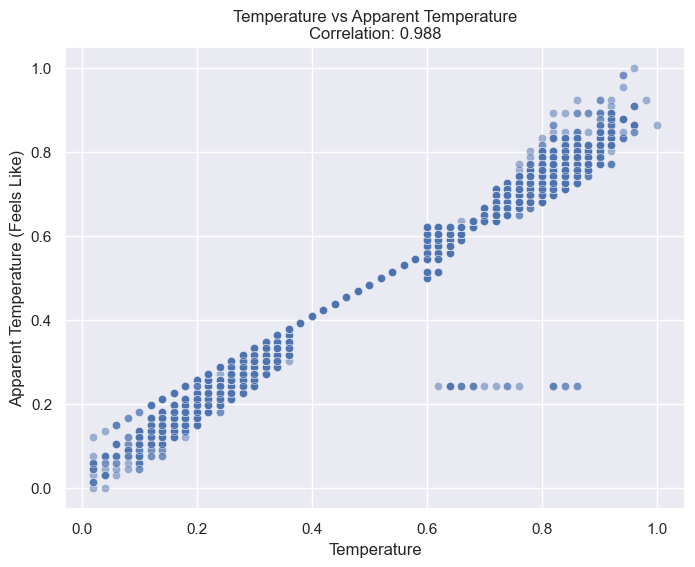

In [69]:
# Calculate correlation between temp and atemp
temp_correlation = hour_data['temp'].corr(hour_data['atemp'])

# Create visualization to show relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hour_data, x='temp', y='atemp', alpha=0.5)
plt.title(f'Temperature vs Apparent Temperature\nCorrelation: {temp_correlation:.3f}')
plt.xlabel('Temperature')
plt.ylabel('Apparent Temperature (Feels Like)')

# Print analysis
print(f"Correlation between temp and atemp: {temp_correlation:.3f}")

# Check their individual correlations with the target variable
temp_target_corr = hour_data['temp'].corr(hour_data['cnt'])
atemp_target_corr = hour_data['atemp'].corr(hour_data['cnt'])

print("\nCorrelations with rental count (cnt):")
print(f"Temperature: {temp_target_corr:.3f}")
print(f"Apparent Temperature: {atemp_target_corr:.3f}")

To avoid multicollinearity, we will drop the `temp` feature as it is highly correlated with `atemp`.

In [70]:
hour_data = hour_data.drop(columns=['temp'])
print("Columns remaining after dropping 'temp':", hour_data.columns.tolist())

Columns remaining after dropping 'temp': ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed', 'cnt']


In [71]:
# Drop any remaining problematic columns
df_clean = hour_data
del hour_data

print("Final columns in cleaned dataset:", df_clean.columns.tolist())


Final columns in cleaned dataset: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed', 'cnt']


## 2. Data Splitting


We will split our data into three sets:
- Training set (60%): Used to train the model
- Validation set (20%): Used to tune hyperparameters and evaluate model during training
- Test set (20%): Used for final model evaluation

This split helps us:
1. Avoid overfitting by evaluating on unseen data
2. Get an unbiased estimate of model performance
3. Fine-tune model parameters without contaminating test data


In [72]:
X = df_clean.drop('cnt', axis=1)
y = df_clean['cnt']

# Split into train (60%), validation (20%), and test (20%)
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 10427
Validation set size: 3476
Test set size: 3476


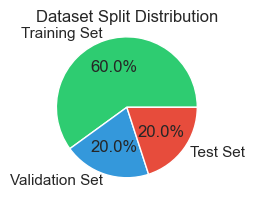

In [75]:
# Create a pie chart showing the data split proportions
import matplotlib.pyplot as plt

# Calculate percentages
total = len(X)
train_pct = len(X_train) / total * 100
val_pct = len(X_val) / total * 100 
test_pct = len(X_test) / total * 100

# Create pie chart
plt.figure(figsize=(2, 2))
plt.pie([train_pct, val_pct, test_pct], 
        labels=['Training Set', 'Validation Set', 'Test Set'],
        autopct='%1.1f%%',
        colors=['#2ecc71', '#3498db', '#e74c3c'])
plt.title('Dataset Split Distribution')
plt.axis('equal')
plt.show()
